In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Install gdown if you haven't already
!pip install gdown

# Replace 'FILE_ID' with the actual file ID
file_id = '15YHebAGrx1Vhv8-naave-R5o3Uo70jsm'
output_path = '/content/dataset.zip'

# Download the dataset file
!gdown --id "$file_id" -O "$output_path"

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=15YHebAGrx1Vhv8-naave-R5o3Uo70jsm
From (redirected): https://drive.google.com/uc?id=15YHebAGrx1Vhv8-naave-R5o3Uo70jsm&confirm=t&uuid=2438c88a-27f1-41bb-9bd4-348926d707bc
To: /content/dataset.zip
100% 279M/279M [00:02<00:00, 120MB/s]


In [3]:

import zipfile

# Replace 'dataset.zip' with the actual filename
with zipfile.ZipFile('/content/dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')


In [4]:
#Import the libraries

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras import layers

from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [5]:
#x-test
def get_test_image():
  image_url = "/content/downloaded_image_mine.jpg"
  return image_url

In [6]:
train_data_path = "/content/dataset/coffee-datasets/symptom/train"
validation_data_path ="/content/dataset/coffee-datasets/symptom/val"
#x-test#
#final_test_path = get_test_image()
#print(final_test_path)

In [7]:
#show augmented images

def plotImages(images_arr):
  fig, axes = plt.subplots(1,5,figsize = (20,20))
  axes = axes.flatten()
  for img,ax in zip(images_arr,axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

In [8]:
#x-test
#process the image taken from internet
# from keras.preprocessing import image
# import numpy as np


# # Load an image for prediction
# img = image.load_img(final_test_path, target_size=(250, 250))
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)
# img_array = img_array / 255.0  # Rescale the image

# # Now, img_array is a NumPy array representing your single image
# print(img_array)
# plotImages(img_array)


In [9]:
#This is the augmentation configuration we will use for training
#It generate more images using below parameters

training_datagen = ImageDataGenerator(rescale = 1./255,
                                      rotation_range = 180,
                                      width_shift_range= 0.1,
                                      height_shift_range= 0.1,
                                      shear_range = 0.2,
                                      zoom_range = 0.2,
                                      horizontal_flip = True,
                                      fill_mode = 'nearest')

#This is a generator that will read pictures found in at
#At train_data_path,and indefinitely generate
# Batches of augmented image data

training_data = training_datagen.flow_from_directory(train_data_path,
                                                     target_size = (250,250),
                                                     batch_size = 32,
                                                     class_mode='sparse')




Found 1539 images belonging to 5 classes.


In [10]:
coffee_classes=training_data.class_indices  ## Display the class
print(coffee_classes)

{'1_health': 0, '2_miner': 1, '3_rust': 2, '4_phoma': 3, '5_cercospora': 4}


In [11]:
# This is the augmentation configuration we will use for validation
#Only rescaling

valid_datagen = ImageDataGenerator(rescale = 1./255)

valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                               target_size = (250,250),
                                               batch_size = 32,
                                               class_mode='sparse')

Found 335 images belonging to 5 classes.


In [12]:
#x-test
#here i need to create tf objects so i will create image data gen and flow() method for single image file


In [13]:
print(training_data)

In [14]:
fnames=list(training_data.filenames)
print(fnames)
for i in fnames:
  print(i,type(i))

['1_health/1037_0777_0406_0177_0174.jpg', '1_health/1037_1214_0366_0242_0229.jpg', '1_health/1047_1137_0218_0206_0198.jpg', '1_health/104_1528_0436_0358_0315.jpg', '1_health/1054_1239_0324_0194_0224.jpg', '1_health/106_0449_0546_0164_0152.jpg', '1_health/1071_1193_0305_0163_0155.jpg', '1_health/1076_1110_0398_0227_0236.jpg', '1_health/1079_1361_0503_0137_0149.jpg', '1_health/107_0085_0422_0219_0196.jpg', '1_health/107_1257_0501_0181_0187.jpg', '1_health/1084_0788_0291_0151_0179.jpg', '1_health/108_1376_0318_0162_0176.jpg', '1_health/1094_0475_0298_0230_0221.jpg', '1_health/1110_1130_0272_0247_0208.jpg', '1_health/1115_1250_0509_0151_0144.jpg', '1_health/1116_1007_0502_0171_0175.jpg', '1_health/1118_1049_0276_0158_0161.jpg', '1_health/112_0569_0551_0198_0157.jpg', '1_health/1156_1208_0408_0230_0209.jpg', '1_health/1185_1117_0514_0191_0156.jpg', '1_health/1187_1064_0390_0212_0231.jpg', '1_health/1193_1272_0541_0205_0155.jpg', '1_health/1193_1600_0394_0264_0233.jpg', '1_health/11_1072_009

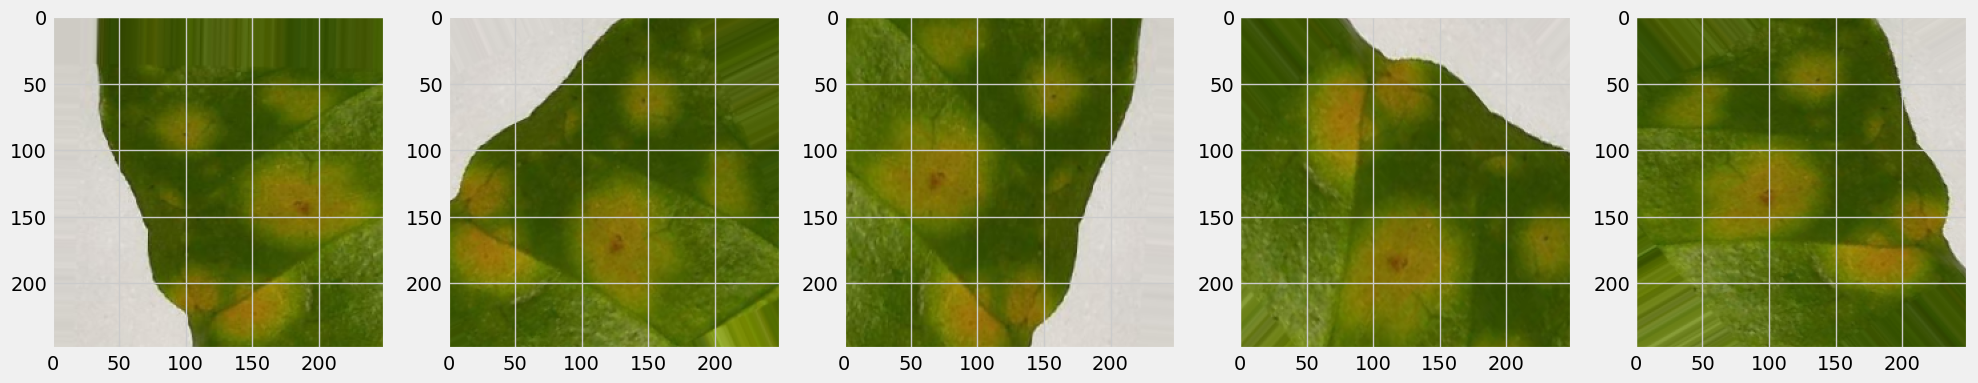

In [15]:
#showing the augmented images

images = [training_data[2][0][0] for i in range(5)]
plotImages(images)

In [16]:
#Save best model using vall accuracy

!mkdir /content/drive/MyDrive/1_model/
model_path = '/content/drive/MyDrive/1_model/pred_coffee_disease.keras'
checkpoint = ModelCheckpoint(model_path,monitor = 'val_accuracy',verbose = 1,save_best_only = True,mode = 'max')
callbacks_list = [ checkpoint ]

mkdir: cannot create directory ‘/content/drive/MyDrive/1_model/’: File exists


In [17]:
cnn_model = cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=16, kernel_size=3,activation='relu', input_shape=[250, 250, 3]),

                                    keras.layers.Conv2D(filters=32, kernel_size=3,activation='relu'),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Dropout(0.25),

                                    keras.layers.Conv2D(filters=64, kernel_size=3,activation='relu'),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Dropout(0.25),

                                    keras.layers.Conv2D(filters=128, kernel_size=3,activation='relu'),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Dropout(0.25),

                                    keras.layers.Flatten(),

                                    keras.layers.Dense(units = 500, activation='relu'),
                                    keras.layers.Dropout(0.4),
                                    keras.layers.Dense(units = 250, activation='relu'),
                                    keras.layers.Dropout(0.3),
                                    # output layer
                                    keras.layers.Dense(units =10, activation='softmax')



])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
## Compiling the model

cnn_model.compile(optimizer = Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:

cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 248, 248, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 246, 246, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 123, 123, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 123, 123, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 121, 121, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 60, 60, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 60, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 58, 58, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 29, 29, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 29, 29, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 107648)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │    53,824,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,049,700 (206.18 MB)

 Trainable params: 54,049,700 (206.18 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Train cnn model

history = cnn_model.fit(training_data,
                        batch_size=128,
                        epochs = 10,
                        #verbose =1,
                        validation_data = valid_data,
                        callbacks = callbacks_list)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 578ms/step - accuracy: 0.2051 - loss: 2.9685
Epoch 1: val_accuracy improved from -inf to 0.38806, saving model to /content/drive/MyDrive/1_model/pred_coffee_disease.keras
49/49 ━━━━━━━━━━━━━━━━━━━━ 53s 798ms/step - accuracy: 0.2060 - loss: 2.9512 - val_accuracy: 0.3881 - val_loss: 1.5253
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.4598 - loss: 1.3929
Epoch 2: val_accuracy improved from 0.38806 to 0.49851, saving model to /content/drive/MyDrive/1_model/pred_coffee_disease.keras
49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 583ms/step - accuracy: 0.4603 - loss: 1.3905 - val_accuracy: 0.4985 - val_loss: 1.2197
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - accuracy: 0.5423 - loss: 1.0948
Epoch 3: val_accuracy improved from 0.49851 to 0.63582, saving model to /content/drive/MyDrive/1_model/pred_coffee_disease.keras
49/49 ━━━━━━━━━━━━━━━━━━━━ 30s 622ms/step - accuracy: 0.5425 - loss: 1.0941 - val_accuracy: 0.6358 - val_loss: 1.0028
Epoc

In [21]:
model_path2 = '/content/drive/MyDrive/1_model/pred_coffee_disease.h5'
cnn_model.save(model_path2)

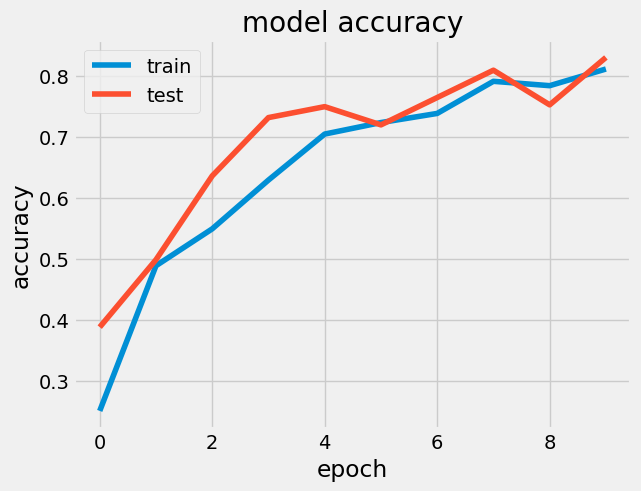

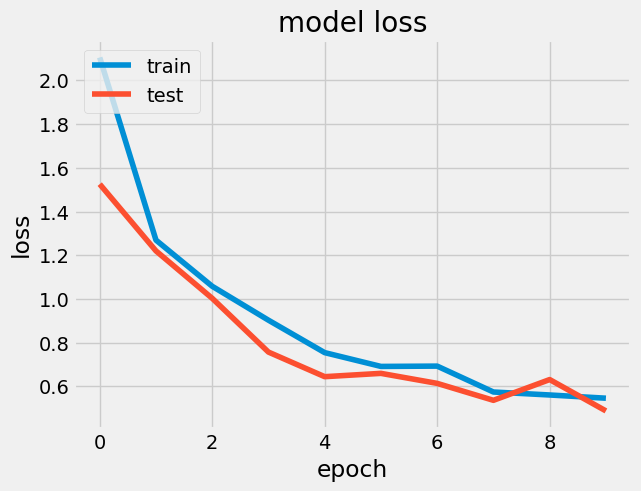

In [22]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
  print('-------------------------------------------')

-------------------------------------------


In [24]:
from keras.models import load_model

# Load the saved model
model = load_model('/content/drive/MyDrive/1_model/pred_coffee_disease.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Class Probabilities: [[1.86990423e-03 2.31787516e-03 9.95090961e-01 3.13113105e-06
  7.17992778e-04 9.42388638e-08 3.92173014e-08 1.34378455e-08
  2.80605565e-08 2.85132682e-08]]


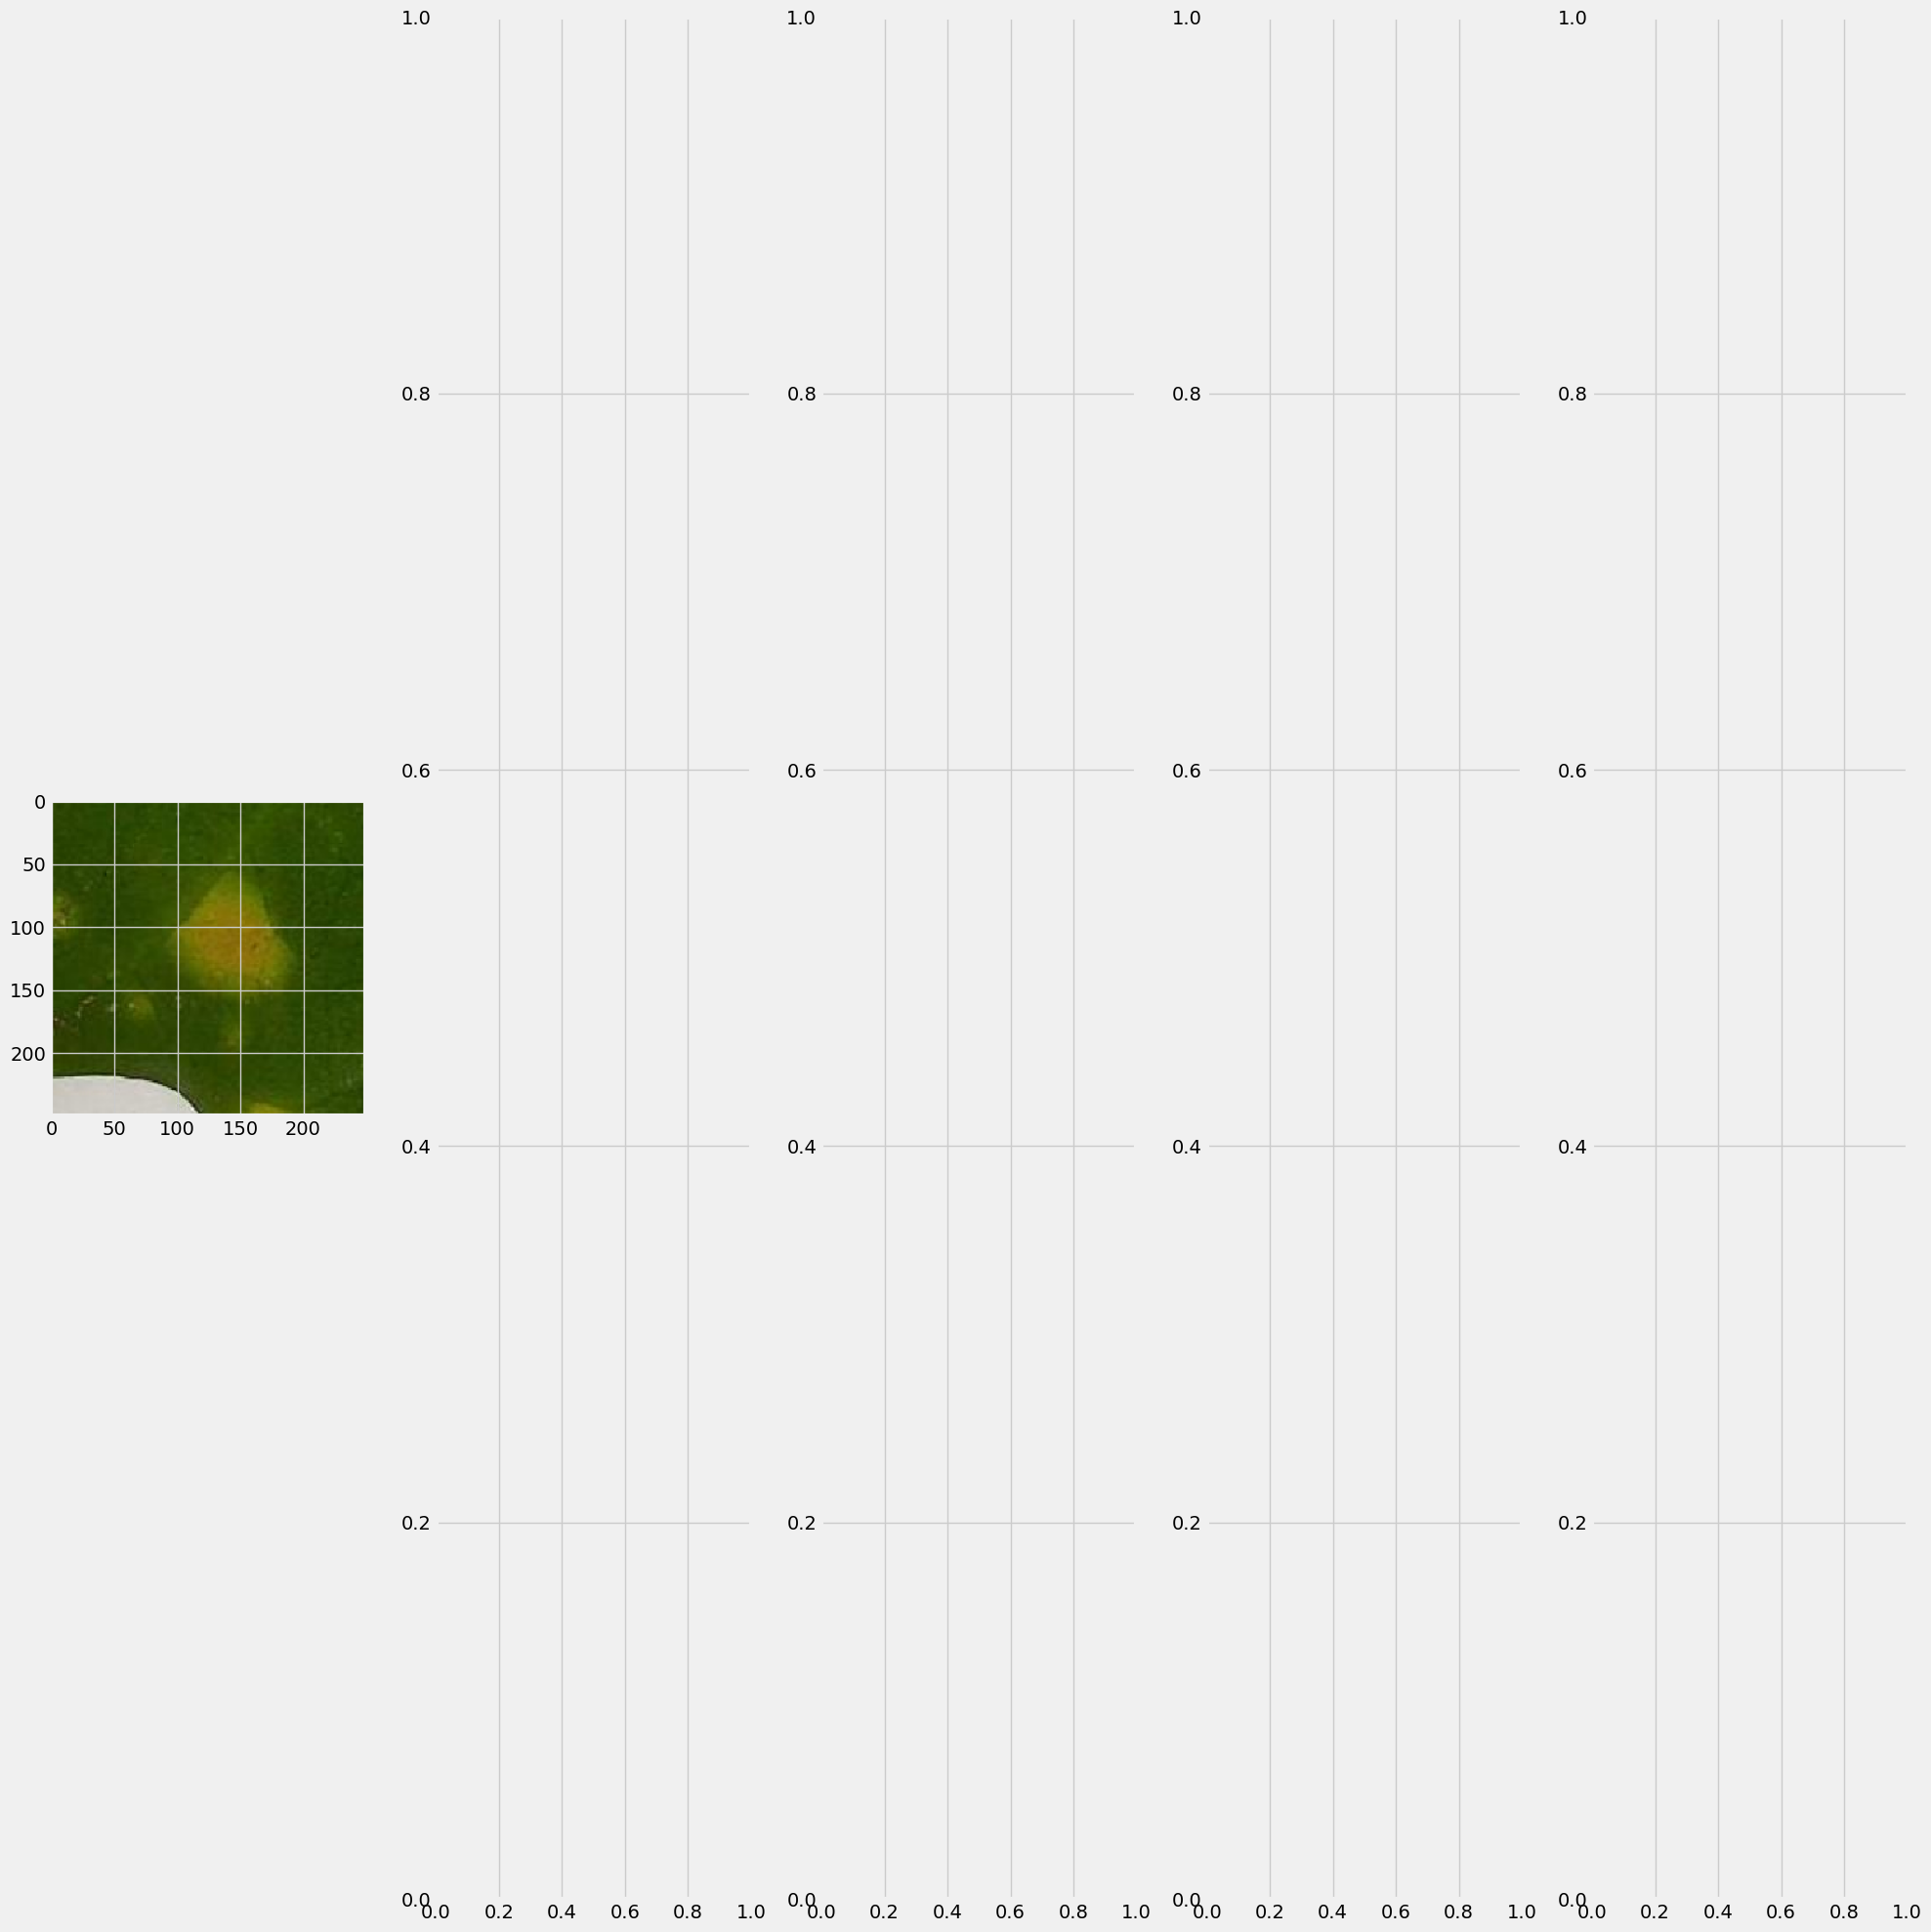

In [32]:
from keras.preprocessing import image
import numpy as np

# Load an image for prediction
#test_image_path='/content/dataset/coffee-datasets/symptom/test/2_miner/1010_1143_0158_0323_0245.jpg'
#test_image_path='/content/dataset/coffee-datasets/symptom/val/3_rust/1036_0827_0313_0122_0128.jpg'
#test_image_path='/content/dataset/coffee-datasets/symptom/test/5_cercospora/1698_1874_0327_0460_0344.jpg'
#test_image_path = '/content/dataset/coffee-datasets/symptom/val/4_phoma/505_0361_0412_0487_0338.jpg'

# test_image_path = '/content/dataset/coffee-datasets/symptom/test/4_phoma/1758_2361_0960_0211_0222.jpg'
test_image_path = '/content/dataset/coffee-datasets/symptom/test/3_rust/104_0581_0709_0182_0171.jpg'



img = image.load_img(test_image_path, target_size=(250, 250))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Rescale the image

# Make a prediction
prediction = model.predict(img)

# You can interpret the prediction results based on your specific problem
print("Predicted Class Probabilities:", prediction)
actual_image=test_image_path.split('/')
plotImages(img)

In [33]:
print(type(prediction))
print(prediction.shape)
print('----------')


<class 'numpy.ndarray'>
(1, 10)
----------


In [34]:
max_confidence=prediction.max()
print(max_confidence)
max_index=np.argmax(prediction)
print(max_index)

0.99509096
2


In [35]:
class_dict={}
for key,value in coffee_classes.items():
  class_dict[value]=key
print(class_dict)

{0: '1_health', 1: '2_miner', 2: '3_rust', 3: '4_phoma', 4: '5_cercospora'}


In [36]:
print('DETECTED: ',class_dict[max_index])
print('Actual: ',actual_image[6])

DETECTED:  3_rust
Actual:  3_rust


#### IMAGES


# New Section

In [30]:
import requests
from io import BytesIO
from PIL import Image

# URL of the image you want to download
#image_url = "https://www.helenacoffee.vn/wp-content/uploads/2022/01/Hemileia-Vastatrix-%E2%80%93-Coffee-Rust-Disease.jpg"
image_url = "https://www.alamy.com/aggregator-api/download?url=https://c7.alamy.com/comp/2GCJMFB/coffee-leafminer-leucoptera-coffeella-old-damage-from-leaf-miners-to-arabica-coffee-leaves-colombia-2GCJMFB.jpg"

# Send an HTTP request to get the image
response = requests.get(image_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Open the image using PIL
    img = Image.open(BytesIO(response.content))

    # Display the image (optional)
    img.show()
    # Save the image (optional)
    img.save("test_download_miner.jpg")

    # Now you can use this 'img' object for further processing or analysis.
else:
    print("Failed to download the image. Status code:", response.status_code)


In [31]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# Load the saved model
model = load_model('/content/model_cnn/pred_coffee_disease.h5')

# Load an image for prediction from the internet
internet_image_path ='/content/test_download_miner.jpg'
img = image.load_img(internet_image_path, target_size=(250, 250))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Rescale the image
# Display the preprocessed image using matplotlib
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()
# Make a prediction
prediction = model.predict(img)

# You can interpret the prediction results based on your specific problem
print("Predicted Class Probabilities:", prediction)
actual_image1=internet_image_path.split('/')

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/model_cnn/pred_coffee_disease.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
max_confidence1=prediction.max()
print(max_confidence1)
max_index1=np.argmax(prediction)
print(max_index1)
print('DETECTED: ',class_dict[max_index1])
print('Actual: ',actual_image1[2])

0.9878154
0
DETECTED:  1_health
Actual:  test_download_miner.jpg
